# Task 1 - Standard LENET-5

Epoch [1/10], Train Loss: 0.0247, Train Accuracy: 89.76%, Test Loss: 0.0236, Test Accuracy: 96.11%
Epoch [2/10], Train Loss: 0.0234, Train Accuracy: 96.61%, Test Loss: 0.0234, Test Accuracy: 97.52%
Epoch [3/10], Train Loss: 0.0232, Train Accuracy: 97.62%, Test Loss: 0.0234, Test Accuracy: 97.41%
Epoch [4/10], Train Loss: 0.0232, Train Accuracy: 98.01%, Test Loss: 0.0232, Test Accuracy: 98.13%
Epoch [5/10], Train Loss: 0.0231, Train Accuracy: 98.27%, Test Loss: 0.0233, Test Accuracy: 97.81%
Epoch [6/10], Train Loss: 0.0231, Train Accuracy: 98.52%, Test Loss: 0.0232, Test Accuracy: 98.20%
Epoch [7/10], Train Loss: 0.0231, Train Accuracy: 98.68%, Test Loss: 0.0232, Test Accuracy: 98.33%
Epoch [8/10], Train Loss: 0.0230, Train Accuracy: 98.83%, Test Loss: 0.0232, Test Accuracy: 98.51%
Epoch [9/10], Train Loss: 0.0230, Train Accuracy: 98.86%, Test Loss: 0.0232, Test Accuracy: 98.46%
Epoch [10/10], Train Loss: 0.0230, Train Accuracy: 98.88%, Test Loss: 0.0232, Test Accuracy: 98.47%
Initial T

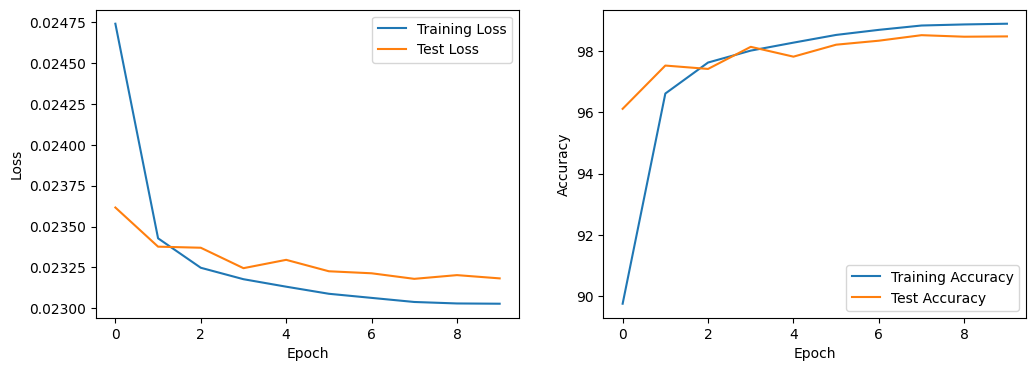

In [52]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# Define the LeNet-5 architecture
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.tanh(self.conv1(x))  # Apply tanh activation
        x = F.avg_pool2d(x, 2)  # Apply pooling
        x = F.tanh(self.conv2(x))  # Apply tanh activation
        x = F.avg_pool2d(x, 2)  # Apply pooling
        x = x.view(x.size(0), -1)
        x = F.tanh(self.fc1(x))  # Apply tanh activation
        x = F.tanh(self.fc2(x))  # Apply tanh activation
        x = self.fc3(x)
        x = F.softmax(x, dim=1)
        return x


# Data preprocessing and loading
transform = transforms.Compose([transforms.Resize((32, 32)), transforms.ToTensor()])
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform)
batch_size = 64
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# Define the training function
def train(model, train_loader, optimizer, criterion, device):
    model.train()
    train_loss = 0
    correct = 0
    for data, target in train_loader:
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        train_loss += loss.item()
        loss.backward()
        optimizer.step()
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()

    train_loss /= len(train_loader.dataset)
    accuracy = 100. * correct / len(train_loader.dataset)
    return train_loss, accuracy

# Define the testing function
def test(model, test_loader, criterion, device):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += criterion(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    accuracy = 100. * correct / len(test_loader.dataset)
    return test_loss, accuracy

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Create LeNet model and optimizer
model = LeNet().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# Training parameters
epochs = 10
train_loss_history = []
train_accuracy_history = []
test_loss_history = []
test_accuracy_history = []

# Training loop
for epoch in range(epochs):
    train_loss, train_accuracy = train(model, train_loader, optimizer, criterion, device)
    test_loss, test_accuracy = test(model, test_loader, criterion, device)

    train_loss_history.append(train_loss)
    train_accuracy_history.append(train_accuracy)
    test_loss_history.append(test_loss)
    test_accuracy_history.append(test_accuracy)

    print(f'Epoch [{epoch+1}/{epochs}], '
          f'Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, '
          f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%')

# Calculate initial test accuracy
initial_test_accuracy = test_accuracy_history[0]
print(f'Initial Test Accuracy: {initial_test_accuracy:.2f}%')

# Visualize training loss and accuracy trends
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss_history, label='Training Loss')
plt.plot(test_loss_history, label='Test Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(train_accuracy_history, label='Training Accuracy')
plt.plot(test_accuracy_history, label='Test Accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.show()
